<a href="https://colab.research.google.com/github/emiliabullano/Herramientas-Computacionales/blob/main/Tarea_1_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea Python. 
# Maria Emilia Bullano y Gastón García Zavaleta


Cargar base de datos

In [3]:
from google.colab import files
uploaded = files.upload()

Saving base_tarea.xls to base_tarea.xls


Abrir liberías. Pandas, IO y Numpy

In [4]:
import pandas as pd
import numpy as np
import io


Abrir base de datos

In [5]:
df = pd.read_excel('base_tarea.xls')

# 1- 	Mostrar las primeras y últimas 5 filas de la base 

In [6]:
print(df.head(n=5))

   Year      ID  ... Labor_Hours       date
0  2013  103381  ...       22392 2003-06-17
1  2013  103404  ...       28447 2005-09-21
2  2013  100759  ...      474784 2001-01-13
3  2013  103246  ...       29193 2006-01-03
4  2013  103451  ...       46393 2007-05-21

[5 rows x 12 columns]


In [5]:
print(df.tail(n=5))

      Year       ID  ... Labor_Hours       date
1445  2013  1103254  ...        8249 2006-02-05
1446  2013  1102636  ...        1449 2007-02-07
1447  2013  4407233  ...       43684 2002-08-17
1448  2013  1518524  ...         622 2002-08-16
1449  2013  1519685  ...        1020 2005-09-28

[5 rows x 12 columns]


# 2- Obtener los tipos de datos de las variables. 

In [ ]:
print(df.dtypes)

Year                          int64
ID                            int64
Name                         object
State                        object
County                       object
columna_nueva               float64
Status                       object
Type                         object
Company Type                 object
Production                    int64
Average Employees             int64
Labor_Hours                   int64
date                 datetime64[ns]
dtype: object


# 3-	Mostrar las primeras y últimas filas de la base de 3 columnas que elijamos (Year, State y Production) 

In [ ]:
df2 = df[["Year", "State", "Production"]]
print(df2.head(n=5))
print(df2.tail(n=5))

   Year    State  Production
0  2013  Alabama       56004
1  2013  Alabama       28807
2  2013  Alabama     1440115
3  2013  Alabama       87587
4  2013  Alabama      147499
      Year            State  Production
1445  2013  Refuse Recovery       18532
1446  2013  Refuse Recovery        5070
1447  2013  Refuse Recovery      377607
1448  2013  Refuse Recovery        7744
1449  2013  Refuse Recovery       17357


# 4-	Mostrar las estadísticas básicas (media, sd, min, max) de "Production".

In [ ]:
print((df["Production"].describe()))

count    1.450000e+03
mean     6.792012e+05
std      4.414922e+06
min      0.000000e+00
25%      0.000000e+00
50%      3.060650e+04
75%      2.514752e+05
max      1.110055e+08
Name: Production, dtype: float64


# 5-	Insertar una columna en la quinta posición y llenarla de valores NaN 

In [6]:
df.insert(4, "columna_nueva", np.nan, allow_duplicates=False)

Corroboramos que efectivamente se crea la columna en la quinta posición

In [7]:
print(df.dtypes)

Year                          int64
ID                            int64
Name                         object
State                        object
columna_nueva               float64
County                       object
Status                       object
Type                         object
Company Type                 object
Production                    int64
Average Employees             int64
Labor_Hours                   int64
date                 datetime64[ns]
dtype: object


# 6-	Importar a un dataframe los datos saltando las primeras 10 filas

In [8]:
df3 = pd.read_excel('base_tarea.xls', skiprows=[i for i in range(1,11)])

Chequeamos

In [9]:
print(df3.head(10))

   Year      ID  ... Labor_Hours       date
0  2013  103180  ...      196963 2005-09-28
1  2013  103182  ...       87314 2005-09-30
2  2013  103285  ...       90584 2006-03-07
3  2013  103332  ...       61394 2007-12-07
4  2013  103375  ...        1900 2002-12-07
5  2013  103419  ...      107469 2003-05-18
6  2013  103432  ...         220 2005-12-24
7  2013  103437  ...       70926 2005-07-24
8  2013  102976  ...       14828 2006-11-15
9  2013  102976  ...       23193 2007-08-10

[10 rows x 12 columns]


# 7-	Añadir una fila con la producción total y las horas de trabajo totales.

Primero creamos la fila a agregar como una lista

In [10]:
lista_total = [np.nan, np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,df["Production"].sum(), np.nan,df["Labor_Hours"].sum(), np.nan]
print(lista_total)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, 984841779, nan, 177910757, nan]


Ahora anexamos al final de la base el vector creado anteriormente

In [ ]:
df_length = len(df)
df.loc[df_length] = lista_total
print(df)

        Year         ID  ...  Labor_Hours       date
0     2013.0   103381.0  ...      22392.0 2003-06-17
1     2013.0   103404.0  ...      28447.0 2005-09-21
2     2013.0   100759.0  ...     474784.0 2001-01-13
3     2013.0   103246.0  ...      29193.0 2006-01-03
4     2013.0   103451.0  ...      46393.0 2007-05-21
...      ...        ...  ...          ...        ...
1447  2013.0  4407233.0  ...      43684.0 2002-08-17
1448  2013.0  1518524.0  ...        622.0 2002-08-16
1449  2013.0  1519685.0  ...       1020.0 2005-09-28
1450     NaN        NaN  ...  177910757.0        NaT
1451     NaN        NaN  ...  177910757.0        NaT

[1452 rows x 13 columns]


# 8-	Importar a un data frame las primeras 10 filas

In [ ]:
df_10 = pd.read_excel('base_tarea.xls', nrows=10)
print(df_10)

# 9-	Crear un subtotal de "Horas de trabajo" por ID (lo hacemos sobre la base general)

In [11]:
subtotal_H = df[["ID",'Labor_Hours']].groupby(by="ID").sum()

In [12]:
print(subtotal_H)

         Labor_Hours
ID                  
100329        144002
100347        215295
100515          6240
100759        474784
100851       1001809
...              ...
4801353      2811138
4801429       161270
4801645        35687
4801646       661265
5000030       286079

[1321 rows x 1 columns]


# 10-	Mostrar los valores para un ID de MSHA específico (ej. 102976)

Lo hacemos para las horas de trabajo acumuladas

In [13]:
print(subtotal_H.loc[[1519402]])


         Labor_Hours
ID                  
1519402         5397


Lo hacemos para todas las variables

In [8]:
df.loc[df["ID"] == 1519402]

,Year,ID,Name,State,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
1430,2013,1519402,Wayland Refuse Pile,Refuse Recovery,Floyd,Active,Refuse,Indepedent Producer Operator,20853,5,5397,2005-09-28


# 11-	Mostrar aquellas observaciones en las que "Horas de trabajo" > 25000

In [ ]:
mayor_2500 = subtotal_H[subtotal_H["Labor_Hours"] > 25000]
mayor_2500.min()

Labor_Hours    25164.0
dtype: float64

# 12-	Encuentre todos los registros que incluyan dos identificaciones específicas de MSHA. (lo hacemos sobre la base original)

In [14]:
df.loc[(df["ID"] == 102901) | (df["ID"] == 102976)]

,Year,ID,Name,State,columna_nueva,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
8,2013,102901,Shoal Creek Mine,Alabama,NaN,Jefferson,Active,Surface,Indepedent Producer Operator,0,5,12396,2002-08-17
9,2013,102901,Shoal Creek Mine,Alabama,NaN,Jefferson,Active,Underground,Indepedent Producer Operator,1453024,571,1237415,2002-08-16
18,2013,102976,Piney Woods Preparation Plant,Alabama,NaN,Shelby,Active,Surface,Indepedent Producer Operator,0,5,14828,2006-11-15
19,2013,102976,Piney Woods Preparation Plant,Alabama,NaN,Shelby,Active,Underground,Indepedent Producer Operator,0,9,23193,2007-08-10


# 13-	Ordenar los registros por la columna “Horas de trabajo” (lo hacemos sobre la base original, de menor a mayor)

In [15]:
df.sort_values(by="Labor_Hours")

,Year,ID,Name,State,columna_nueva,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
837,2013,3608140,Bell Corp,Pennsylvania (Anthracite),NaN,Schuylkill,Temporarily closed,Surface,Indepedent Producer Operator,23,2,35,2005-09-21
213,2013,1519619,No. 1 Auger,Kentucky (East),NaN,Floyd,Temporarily closed,Surface,Indepedent Producer Operator,700,3,40,2005-07-24
1437,2013,3610027,Paradise Bank,Refuse Recovery,NaN,Northumberland,"New, under construction",Refuse,Indepedent Producer Operator,52,1,53,2005-07-24
740,2013,3609189,Ser #3163,Pennsylvania (Bituminous),NaN,Indiana,Active,Surface,Indepedent Producer Operator,574,1,54,2001-01-13
1433,2013,1519554,No 1,Refuse Recovery,NaN,Harlan,Permanently abandoned,Refuse,Indepedent Producer Operator,8586,1,133,2007-12-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,2013,4601437,Mcelroy Mine,West Virginia (Northern),NaN,Marshall,Active,Underground,Operating Subsidiary,9403070,957,2194378,2007-02-07
25,2013,101401,No 7 Mine,Alabama,NaN,Tuscaloosa,Active,Underground,Operating Subsidiary,5405412,989,2464719,2005-06-25
1413,2013,4801353,North Antelope Rochelle Mine,Wyoming,NaN,Campbell,Active,Surface,Operating Subsidiary,111005549,1349,2811138,2006-03-07
711,2013,3607230,Bailey Mine,Pennsylvania (Bituminous),NaN,Greene,Active,Underground,Operating Subsidiary,11321481,1222,3015772,2005-09-30


# 14-	Haga una lista en donde date esté entre febrero 2005 y noviembre 2006 (lo hacemos sobre la base original)

In [16]:
df_fechas = df[(df['date'] >= '2005-02-01') & (df['date'] < '2006-11-01')]
df_fechas.sort_values(by="date")

,Year,ID,Name,State,columna_nueva,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
724,2013,3608222,Homer City Generating Station,Pennsylvania (Bituminous),NaN,Indiana,Active,Surface,Indepedent Producer Operator,0,1,3906,2005-06-25
259,2013,1517232,Richland No 9,Kentucky (West),NaN,Hopkins,Active,Underground,Operating Subsidiary,690911,71,177731,2005-06-25
860,2013,3609259,#2 Strip Mine,Pennsylvania (Anthracite),NaN,Schuylkill,Temporarily closed,Surface,Indepedent Producer Operator,1557,1,850,2005-06-25
880,2013,3608083,Joepa,Pennsylvania (Bituminous),NaN,Somerset,Active,Surface,Indepedent Producer Operator,110395,19,42861,2005-06-25
240,2013,1519170,Ky No. 5,Kentucky (East),NaN,Harlan,"Active, men working, not producing",Surface,Indepedent Producer Operator,67113,19,41083,2005-06-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,2013,4404856,Buchanan Mine #1,Virginia,NaN,Buchanan,Active,Underground,Operating Subsidiary,4783655,596,1420129,2006-03-07
208,2013,1519242,Redhawk #1,Kentucky (East),NaN,Floyd,Active,Underground,Indepedent Producer Operator,558203,104,221627,2006-03-07
539,2013,2901879,Lee Ranch Coal Mine,New Mexico,NaN,Mckinley,Active,Surface,Operating Subsidiary,19395,26,56640,2006-03-07
228,2013,1517971,Days Creek Stockpile,Kentucky (East),NaN,Harlan,Active,Underground,Operating Subsidiary,0,4,10034,2006-03-07


# 15-	Mostrar la lista de aquellos cuyos date sea 2005 

In [17]:
df_2005 = df[df['date'].dt.year == 2005]
df_2005

,Year,ID,Name,State,columna_nueva,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
1,2013,103404,Reid School Mine,Alabama,NaN,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,28807,18,28447,2005-09-21
5,2013,103433,Crane Central Mine,Alabama,NaN,Jackson,Temporarily closed,Surface,Indepedent Producer Operator,69339,27,47195,2005-06-25
10,2013,103180,Sloan Mountain Mine,Alabama,NaN,Jefferson,Active,Surface,Indepedent Producer Operator,327780,84,196963,2005-09-28
11,2013,103182,Fishtrap,Alabama,NaN,Jefferson,Active,Surface,Operating Subsidiary,175058,30,87314,2005-09-30
16,2013,103432,Skelton Creek,Alabama,NaN,Jefferson,Temporarily closed,Surface,Indepedent Producer Operator,8252,3,220,2005-12-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,2013,3609843,Atlas Anthracite Coal Corporat,Refuse Recovery,NaN,Northumberland,Active,Refuse,Indepedent Producer Operator,28055,8,13036,2005-12-24
1437,2013,3610027,Paradise Bank,Refuse Recovery,NaN,Northumberland,"New, under construction",Refuse,Indepedent Producer Operator,52,1,53,2005-07-24
1440,2013,3609405,Phoenix,Refuse Recovery,NaN,Washington,Active,Refuse,Indepedent Producer Operator,4473,5,5670,2005-09-21
1444,2013,1519713,# 1 Refuse,Refuse Recovery,NaN,Letcher,"Active, men working, not producing",Refuse,Indepedent Producer Operator,1879,2,200,2005-06-25


# 16-	Ordenar en base a ID y date columnas dadas 

In [18]:
df.sort_values(by=['ID','date'], ascending=[False,True])

,Year,ID,Name,State,columna_nueva,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
48,2013,5000030,Usibelli,Alaska,NaN,Fairbanks North Star,Active,Surface,Indepedent Producer Operator,1631584,125,286079,2002-08-17
1420,2013,4801646,Bridger Underground Coal Mine,Wyoming,NaN,Sweetwater,Active,Underground,Operating Subsidiary,4442616,278,661265,2003-06-17
61,2013,4801645,Addcar System 18 Hwm Serial No,Colorado,NaN,Rio Blanco,Active,Surface,Indepedent Producer Operator,350060,17,35687,2001-01-13
1414,2013,4801429,Dry Fork Mine,Wyoming,NaN,Campbell,Active,Surface,Operating Subsidiary,5433936,78,161270,2007-12-07
1413,2013,4801353,North Antelope Rochelle Mine,Wyoming,NaN,Campbell,Active,Surface,Operating Subsidiary,111005549,1349,2811138,2006-03-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2013,100851,Oak Grove Mine,Alabama,NaN,Jefferson,Active,Underground,Operating Subsidiary,2269014,447,1001809,2007-02-07
2,2013,100759,North River #1 Underground Min,Alabama,NaN,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,1440115,183,474784,2001-01-13
1441,2013,100515,Mary Lee # 1 Mine,Refuse Recovery,NaN,Walker,"Active, men working, not producing",Refuse,Indepedent Producer Operator,8400,4,6240,2001-01-13
32,2013,100347,Choctaw Mine,Alabama,NaN,Walker,Active,Surface,Indepedent Producer Operator,537429,82,215295,2006-03-07


# 17-	Crear tres hojas de datos (sheet) desde el archivo de Excel y combinarlas en un único Excel. Las tres hojas de datos son las mismas, sería triplicar el Excel

Cargamos el archivo con las 3 bases

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving base_tarea_triplicada.xls to base_tarea_triplicada.xls


Abrimos las 3 bases por separado

In [ ]:
triple_1 = pd.read_excel('base_tarea_triplicada.xls', sheet_name="Hist_Coal_Prod")
triple_2 = pd.read_excel('base_tarea_triplicada.xls', sheet_name="Hist_Coal_Prod (2)")
triple_3 = pd.read_excel('base_tarea_triplicada.xls', sheet_name="Hist_Coal_Prod (3)")


Combinamos las 3 bases

In [ ]:
df_triplicada = pd.concat([triple_1, triple_2, triple_3])
df_triplicada

# 18-	Dibujar un gráfico de barras comparando el año, el ID, la producción y las horas de trabajo de las primeras 10 observaciones.

Abrimos la librería matplotlib.pyplot

In [ ]:
import matplotlib.pyplot as plt
# Para que Matplotlib plots lo muestre en notebook.
%matplotlib inline

Hacemos el gráfico de barras para la producción y las horas de trabajo de las primeras 10 observaciones

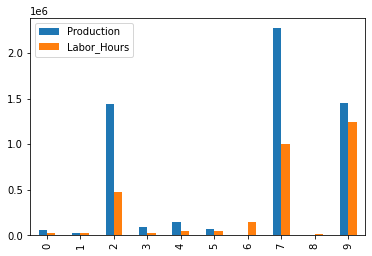

In [ ]:
df_10[["Production", "Labor_Hours"]].plot(kind ="bar")

# 19-	Dibujar un gráfico de barras de las 10 empresas con mayor producción.  

In [ ]:
Computamos la producción total de cada firma 

In [ ]:
empresas_prod = df[["Name",'Production']].groupby(by="Name").sum()

Ordenamos las firmas según su producción, de mayor a menor. Seleccionamos las primeras 10.

In [ ]:
empresas_prod_sort = empresas_prod.sort_values(by="Production", ascending=False)

In [ ]:
empresas_prod_10 = empresas_prod_sort.head(10)

Graficamos

In [ ]:
empresas_prod_10[["Production"]].plot(kind ="bar")